<a href="https://colab.research.google.com/github/mm002a/JupyterNotebooks-V0.0/blob/main/BuckleyLeverett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buckley Leverett Equations and Water injection/breakthrough

#### Version 1.0      20/May/2021, Chris Thompson
### Scope
This is aimed as a walkthrough - a derivation of the Buckley Leverett Equations and some case studies on water breakthrough.


> *There is a large body of pedagogic research which shows that students' long term achievement is significantly enhanced if individuals work through problems for themselves rather than copying material.*

#####Version 1.1 28/03/2023 Updated to include connate water.


 ### Introduction
 The derivation of the Buckley Leverett Equations can be found in ME5623 
 (LatexInProgress\MultiphaseFlows\BuckleyLeverett.tex et al.)

### Resources
#### Web
   1. [A SIMPLIFIED APPROACH TO THE ANALYSIS OF OIL DISPLACEMENT BY WATER IN STRATIFIED RESERVOIRS](https://www.eajournals.org/wp-content/uploads/A-Simplified-Approach-to-the-Analysis-of-Oil-Displacement-by-Water-in-Stratified-Reservoirs.pdfhttps://www.eajournals.org/wp-content/uploads/A-Simplified-Approach-to-the-Analysis-of-Oil-Displacement-by-Water-in-Stratified-Reservoirs.pdf)
   2. [BUCKLEY-LEVERETT ANALYSIS](http://www.ipt.ntnu.no/~kleppe/TPG4150/BL.pdf)
   3. A good reference - see also the next pages on [Immiscible Displacement Buckley-Leverett Theory](https://perminc.com/resources/fundamentals-of-fluid-flow-in-porous-media/chapter-4-immiscible-displacement/buckley-leverett-theory/https://perminc.com/resources/fundamentals-of-fluid-flow-in-porous-media/chapter-4-immiscible-displacement/buckley-leverett-theory/)
      1. Water Injection Oil Recovery CalculationsWater Injection Oil Recovery Calculations
      1. Vertical and Volumetric Sweep EfficienciesVertical and Volumetric Sweep Efficiencies
      1. Review of Gravity Related Oil Recovery StudiesReview of Gravity Related Oil Recovery Studies
#### Papers
   1. Ahmed, T., Reservoir Engineering Handbook, Gulf Publishing 2000.
   1. [**Buckley, S.E., and Leverett, M.C., “Mechanism of Fluid Displacement in Sands”, Trans. AIME 1942.**]( https://onepetro.org/TRANS/article/146/01/107/161720/Mechanism-of-Fluid-Displacement-in-Sands)
   1. Craig, F., Geffen, T., and Morse, R., “Oil Recovery Performance of Pattern Gas or Water Injection Operations from Model Tests”, JPT, Jan. 1955.
   1. Craig, F., The Reservoir Engineering Aspects of Waterflooding, Society of Petroleum Engineers, 1971.
   1. Smith, C.R., Mechanics of Secondary Oil Recovery, Robt. E. Krieger Publishing, 1966.
   1. Stiles, W.E., “Use of Permeability Distribution in Waterflood Calculations,”Trans. AIME, 1951.
   1. **Welge, H.J., “A Simplified Method for Computing Oil Recovery by Gas or Water Drive”,Trans. AIME 1952.** https://doi.org/10.2118/124-G
   1. Willhite, G.P., Waterflooding. Society of Petroleum Engineers, 1986.
   1. World Oil (editorial), “Practical Waterflooding Shortcuts”, December 1966

#### Case Study (Craft and Hawkins (1959))
   * [Classic Waterflooding Predicitive Models](http://www.oilproduction.net/files/teorias_clasicas_recuperacion_secundaria.pdf)

We started with the Darcy equation and extended it to the case of two phases. We then deduced two equations; one for the fractional flow of water: $f_w$; the second for the position of a point (or line/plane in more dimensions) of constant water saturation, $x^{S_w}$
\begin{align*}  
f_w &= \frac{1}{1 + \frac{k_{ro}\mu_w}{k_{rw}\mu_o}}        \tag{ 1}\\
\frac{d}{dt}x^{S_w}(t) &= \frac{q_{tot}}{A\phi}\frac{d f_w}{d S_w} \\
\textsf{and, along a constant $S_w$ path: }&\\
x^{S_w}(t) &= \frac{Q_{inj}}{A\phi}\frac{d f_w}{d S_w} \tag{ 2}
\end{align*}
We use the observation that in many fields we find that: $\frac{k_{ro}}{k_{rw}} = a \exp (-b S_w)$  
Substituting in, we arrive at: 
\begin{align*}
f_w &=  \frac{1}{1 + \frac{\mu_w}{\mu_o}a \exp (-b S_w)}
\end{align*}

With this substitution we can also compute the derivative $df_w/dS_w$:  
\begin{align*}
\frac{df_w}{dS_w} &=  \frac{d}{dS_w}
    \left ( 1 + \frac{\mu_w}{\mu_o}a \exp (-b S_w) \right ) ^{-1}\\
     &= a b \frac{\mu_w}{\mu_o}\exp (-b S_w)\left (1 + \frac{\mu_w}{\mu_o}{a \exp (-b S_w)}\right )^{-2} \tag{ 3}
\end{align*}

We now compute from the data $a$ and $b$ by regression, using the data supplied: 
\begin{align*}
\frac{k_{ro}}{k_{rw}} &= 529.39 \exp{(-11.7S_w)} 
\end{align*}
(Coefficients validated by Excel and the python below.) 



#### We now use a little analytic geometry and calculus.
Firstly, we recall this lemma: For any differentiable function $y(x)$ the mean value of the gradient between two points is equal to the secant joining the two points:
\begin{align*}
\textsf{Lemma}: ~~~~\left . \overline{\frac{dy(x)}{dx}} \right |^{x_2}_{x_1} = \frac{1}{x_2 - x_1}\int^{x_2}_{x_1} \frac{dy}{dx} dx = \frac{y(x_2) - y(x_1)}{x_2 - x_1}
\end{align*}
Moreover, because of the form of $f_w$ we note that:
\begin{align*}
\frac{df_w}{dS_w} = a b \frac{\mu_w}{\mu_o}\exp (-b S_w) f_w(S_w)^2 \tag{ 4}
\end{align*}
We want to find the line which is tangent to the curve ($S_w, f_w$) 
and which passes through the the point ($S_{wc}, 0$), 
(because by definition: $f_w(S_{wc}) = 0$).  
Let us denote the point of tangential contact by the coordinates: ($S_w^\star, f_w(S_w^\star)$).
At this point we can combine these equations to give:
\begin{align*}
f_w(S_w^\star) &= \frac{df_w}{dS_w}(S_w^\star) \times (S_w^\star - S_{wc})\\
               &= a b \frac{\mu_w}{\mu_o}\exp (-b S_w^\star) f_w(S_w^\star)^2 \times (S_w^\star - S_{wc})\\
\textsf{ which simplifies to:}\\
1 &= a b \frac{\mu_w}{\mu_o}\exp (-b S_w^\star) f_w(S_w^\star) \times (S_w^\star - S_{wc}) \tag{ 5}
\end{align*}
We solve this numerically, below.

Finally, we derive the equations defining the flow parameters at waterbreak through.
References are:
   * Welge (1952), Journal of Petroleum Technology.
   * [Dake (1996)](https://www.elsevier.com/books/the-practice-of-reservoir-engineering/dake/978-0-444-88538-8) The practice of reservoir engineering, Revised Edition.
   * [Irreducible Water Saturation](https://www.sciencedirect.com/topics/engineering/irreducible-water-saturation)
   
We want to calculate the mean water saturation between $x_1$ and $x_2$.  

See Dake P354 - in Mendeley.
Dake give **three more examples** of recovery calculations!  
We use the fact that:
\begin{align}
x^{S_w} =& \frac{Q_{inj}}{A\phi}\left .\frac{d f_w}{d S_w}\right |_{S_w}\\
    =& \alpha \left .\frac{d f_w}{d S_w}\right |_{S_w} \tag{6}
\end{align}
(where  $\alpha$ is constant).  
  
We define the mean of $S_w$ by:
\begin{align*}
\overline{S_w} &= \frac{1}{x_2 - x_1}\int ^{x_2}_{x_1}S_w (x)dx \\
 &= \frac{1}{f_2^\prime - f_1^\prime}
        \int ^{f_2^\prime}_{f_1^\prime}S_w(f^\prime)
      df^\prime ~~~~\textsf{(changing the variable and using (6))}\\
&= \frac{1}{f_2^\prime - f_1^\prime}
    \left \{ \left [  S_w f^\prime\right ]^{f_2^\prime}_{f_1^\prime}
      - \int^{f_2^\prime}_{f_1^\prime} S_w(f^\prime) df^\prime \right \}
      ~~~~~~~~\textsf{integrating by parts}\\
&= \frac{1}{f_2^\prime - f_1^\prime}
    \left \{ \left [  S_w f^\prime\right ]^{f_2^\prime}_{f_1^\prime}
      - \int^{f_2}_{f_1}  df \right \}~~~~~~~~
\textsf{because } ~~~~~~df^\prime = \frac{df}{dS_w}\\
 &=  \left \{ 
   \frac{S_w(x_2)f_2^\prime - S_w(x_1)f_1^\prime}{f_2^\prime - f_1^\prime}
    - \frac{f_w(x_2) -f_w(x_1)}{f_2^\prime - f_1^\prime}  
   \right \}\\
    &=  \left \{ 
   S_w(x_2) - \frac{f_w(x_2) -1}{\left.\frac{df_w}{dS}\right |_{x_2}}  
   \right \} \tag{7}
\end{align*}
To obtain the final result we have used:
   * The injection area (including $x_1$) is saturated with water, so: 
   $\frac{df_w}{dS}(x_1) = f_1^\prime = 0$.
   * Similarly, $f_w(x_1) = 1$  
    The value of $S_w(x_1) = 1 - S_{or}$; $S_{or}$ is the residual oil fraction which is immobile.  

Welge states that this can be re-arranged, using the injection of water, to give:
\begin{align*}
\overline{S_w} - S_w(x_2) = f_{o}(x_2)Q_{inj} (x_1)
\end{align*}
where $Q_{inj}$ is the total volume of water injected at the site when the saturation reaches the outflow face $x_2$ and $f_o = 1-f_w$.  
So it's easy. We use (7) to calaculate $\overline{S_w}$.


In [2]:
import numpy
from scipy import optimize
def FitAB(SW,FW, DEBUG = 0):
    """
    DEFINE Calculate a, b in the expression for k_{ro}/k_{rw} = 𝑎exp(𝑏𝑆𝑤). (See above.)
    Input: SW, KK, DEBUG = 1(if required) - this from the data supplied in the case study.
    Perform a linear, least-squares fit to the ln(KK)
    RETURNS [A,B]
    """
    import math
    from scipy import odr
    import numpy
    LogKK = numpy.lib.scimath.log(KK)
    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.polynomial.html#scipy.odr.polynomial
    poly_model = odr.polynomial(1)  # using first order polynomial model
    data = odr.Data(SW,LogKK)
    odr_obj = odr.ODR(data, poly_model)
    output = odr_obj.run()
    #Convert back to real exponential model.
    Alpha = math.exp(output.beta[0])
    poly = numpy.poly1d(output.beta[::-1])
    poly_y = poly(SW)
    if DEBUG == 1 :
        print("OutputBeta: ",output.beta,"should be [",numpy.lib.scimath.log(529.39)," -11.7]\n")
        print("Kro/Krw: ",KK)
        print("Y: ",numpy.exp(poly_y)," matches LogKK - correct!")
    return [Alpha,output.beta[1]]
def FW(SW,a,b, MUW = 1.0, MUO = 2.0 , DEBUG = 0):
    """
    Compute f_w(S_w;mu_w,mu_o)
    Validated with http://www.oilproduction.net/files/teorias_clasicas_recuperacion_secundaria.pdf
    https://wiki.anton-paar.com/en/water/ muw mPa.s & /crude-oil 3 nu mm^2/s
    """
    FW = 1 + (MUW/MUO)*a*numpy.exp(b*SW)
    FWVAL = 1.0/FW
    return FWVAL
def dFWdSW(SW,a,b, MUW = 1.0, MUO = 2.0 , DEBUG = 0):
    """
    Compute df_w/dS_w(S_w;mu_w,mu_o)
    Validated with http://www.oilproduction.net/files/teorias_clasicas_recuperacion_secundaria.pdf
    https://wiki.anton-paar.com/en/water/ muw mPa.s & /crude-oil 3 nu mm^2/s
    """
    numer = (MUW/MUO)*a*b*numpy.exp(b*SW)
    denom = 1 + (MUW/MUO)*a*numpy.exp(b*SW)
    deriv = - numer/(denom**2)
    return deriv
def dFWdSW2(SW,a ,b , MUW = 1.0, MUO = 2.0 , DEBUG = 0):
    """
    Compute the derivative of FW by method 2!
    """
    alpha = a*MUW/MUO
    deriv2 = - alpha * b * numpy.exp(b*SW) * pow(FW(SW,a,b),2)
    return deriv2
def funcBLroot(Swit,ARGS):
    """
    ARGS[0] = a, ARGS[1]= b, MUW = ARG[2], MUO = ARGS[3], Sc = ARGS[4], DEBUG = ARGS[5]
    Using Eqn 5 (above)
    included connate water 28/3/23.
    """
    a,b,MUW,MUO,Sc,DEBUG = ARGS[0], ARGS[1], ARGS[2],ARGS[3],ARGS[4],ARGS[5]
    alpha = a * MUW/MUO
    Value = (alpha * b * numpy.exp(b*Swit))*(Swit-Sc)*FW(Swit,a,b) + 1
    if DEBUG != 0: print("\n In <funcBLroot> Value,SW,a,b: ",Value,SW,a,b)
    return Value
def FindTangent(Sw,a,b, Sc, MUW = 1.0, MUO = 2.0 , DEBUG = 0):
  #DOES NOT WORK 27/3/2023? (Maybe it does!!)
    ARGS = [a, b, MUW, MUO, Sc,DEBUG]
    TSw0 = 0.5
    TSw = optimize.fsolve(funcBLroot, TSw0, ARGS,full_output=0,xtol=1.0e-09)
    return TSw[0]

SW = numpy.arange(0.25,0.80,0.05)
KK = numpy.array([3.023E+01,1.7E+01,9.56E+00,5.38E+00,3.02E+00,1.7E+00,9.6E-01,5.4E-01,3.0E-01,1.7E-01,1.0E-01])
# does NOT exactly include connate oil Sc = 0.2 - It cannot!
ab = FitAB(SW,KK, DEBUG = 1)
print("\nCASE: Craft and Hawkins (1959)")
print("Coefficients for k_{ro}/k_{rw} are: ","a: ",ab[0]," b: ",ab[1])
FWVAL = FW(SW,ab[0],ab[1])
print("FW Val: ",FWVAL)
dFWdSWVAL = dFWdSW(SW,ab[0],ab[1])
print("dFw/dSw Val: ",dFWdSWVAL)
dFWdSWVAL2 = dFWdSW2(SW,ab[0],ab[1])
print("d^2Fw/dSw^2 Val: ",dFWdSWVAL2)

print("\n Find Analytic Tangent \n")
MUW,MUO,Sc,DEBUG = 1.0, 2.0, 0.2, 0
print("MUw = ",MUW , "MUo = ", MUO, " Sconnate = ", Sc ,"DEBUG = ",DEBUG)
ARGS = [ab[0], ab[1], Sc, MUW, MUO, DEBUG]
TSw0 = 0.5 # Starting guess for solver.
TSw = FindTangent(TSw0,ab[0],ab[1], Sc, MUW = 1.0, MUO = 2.0 , DEBUG = 0)
Grad = dFWdSW(TSw,ab[0],ab[1])
print("Required tangent. Contact at (Sw,fw): ", TSw, FW(TSw,ab[0],ab[1]),"\n Slope: ", Grad)
print("4 por Chuck Norman - Tiorco Inc. GIVES: \nS_w = 0.596, K/K= 0.57, fw= 0.779, df/dS= 1.975")
print("Check- (Tan)(S_w-S_c)*dF:  ",(TSw-Sc)*dFWdSW(TSw,ab[0],ab[1]))
SWbar=Sc+1/Grad
print("SWbar (Intercept) :",SWbar)

OutputBeta:  [  6.27196332 -11.47434728] should be [ 6.271725400305944  -11.7]

Kro/Krw:  [30.23 17.    9.56  5.38  3.02  1.7   0.96  0.54  0.3   0.17  0.1 ]
Y:  [30.06544476 16.93968568  9.54427759  5.37750443  3.02983161  1.70708917
  0.96182026  0.54191558  0.30532991  0.17203114  0.096927  ]  matches LogKK - correct!

CASE: Craft and Hawkins (1959)
Coefficients for k_{ro}/k_{rw} are:  a:  529.5159657882865  b:  -11.474347277526226
FW Val:  [0.06237244 0.10559837 0.17324601 0.27109438 0.39762763 0.53950685
 0.67526042 0.78680819 0.86755479 0.92079711 0.95377664]
dFw/dSw Val:  [0.67104413 1.08372177 1.64349174 2.26735647 2.74833448 2.85067776
 2.51613829 1.92471919 1.31844241 0.83682174 0.50586676]
d^2Fw/dSw^2 Val:  [0.67104413 1.08372177 1.64349174 2.26735647 2.74833448 2.85067776
 2.51613829 1.92471919 1.31844241 0.83682174 0.50586676]

 Find Analytic Tangent 

MUw =  1.0 MUo =  2.0  Sconnate =  0.2 DEBUG =  0
Required tangent. Contact at (Sw,fw):  0.5966452111620645 0.780279896549

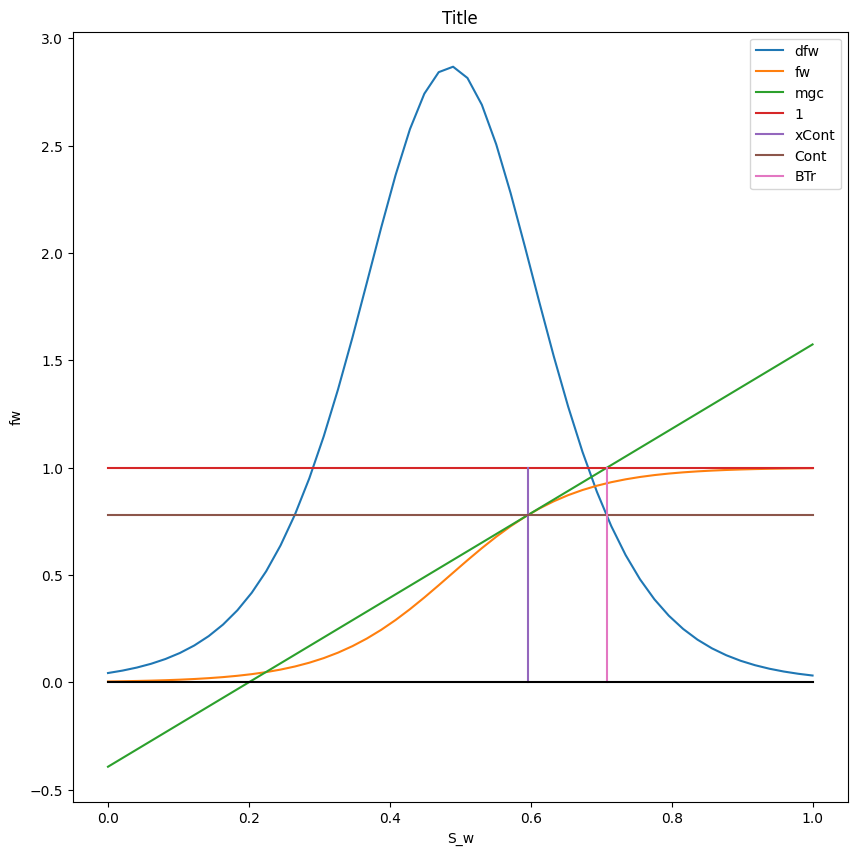

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#For large graphs
plt.rcParams["figure.figsize"] = (10,10)
Sw = np.linspace(0.0, 1.0)
y = FW(Sw,ab[0],ab[1])
dy = dFWdSW(Sw,ab[0],ab[1])
#plt.plot(Sw, y, label="fw",Sw,dy, label="dfw")
plt.plot(Sw,dy, label="dfw")
plt.plot(Sw, y, label="fw")
plt.plot(Sw, (Sw-Sc)*dFWdSW(TSw,ab[0],ab[1]), label="mgc")
plt.plot(Sw, numpy.ones(len(Sw)), label="1")
plt.plot([TSw,TSw], [0,1], label="xCont")
plt.plot([0,1], [FW(TSw,ab[0],ab[1]),FW(TSw,ab[0],ab[1])], label="Cont")
plt.plot([1.0/dFWdSW(TSw,ab[0],ab[1])+Sc,1.0/dFWdSW(TSw,ab[0],ab[1])+Sc], [0,1], label="BTr")
plt.plot([0,1],[0,0],color='k')
plt.xlabel('S_w')
plt.ylabel('fw')
plt.title('Title')
plt.legend()
plt.show()

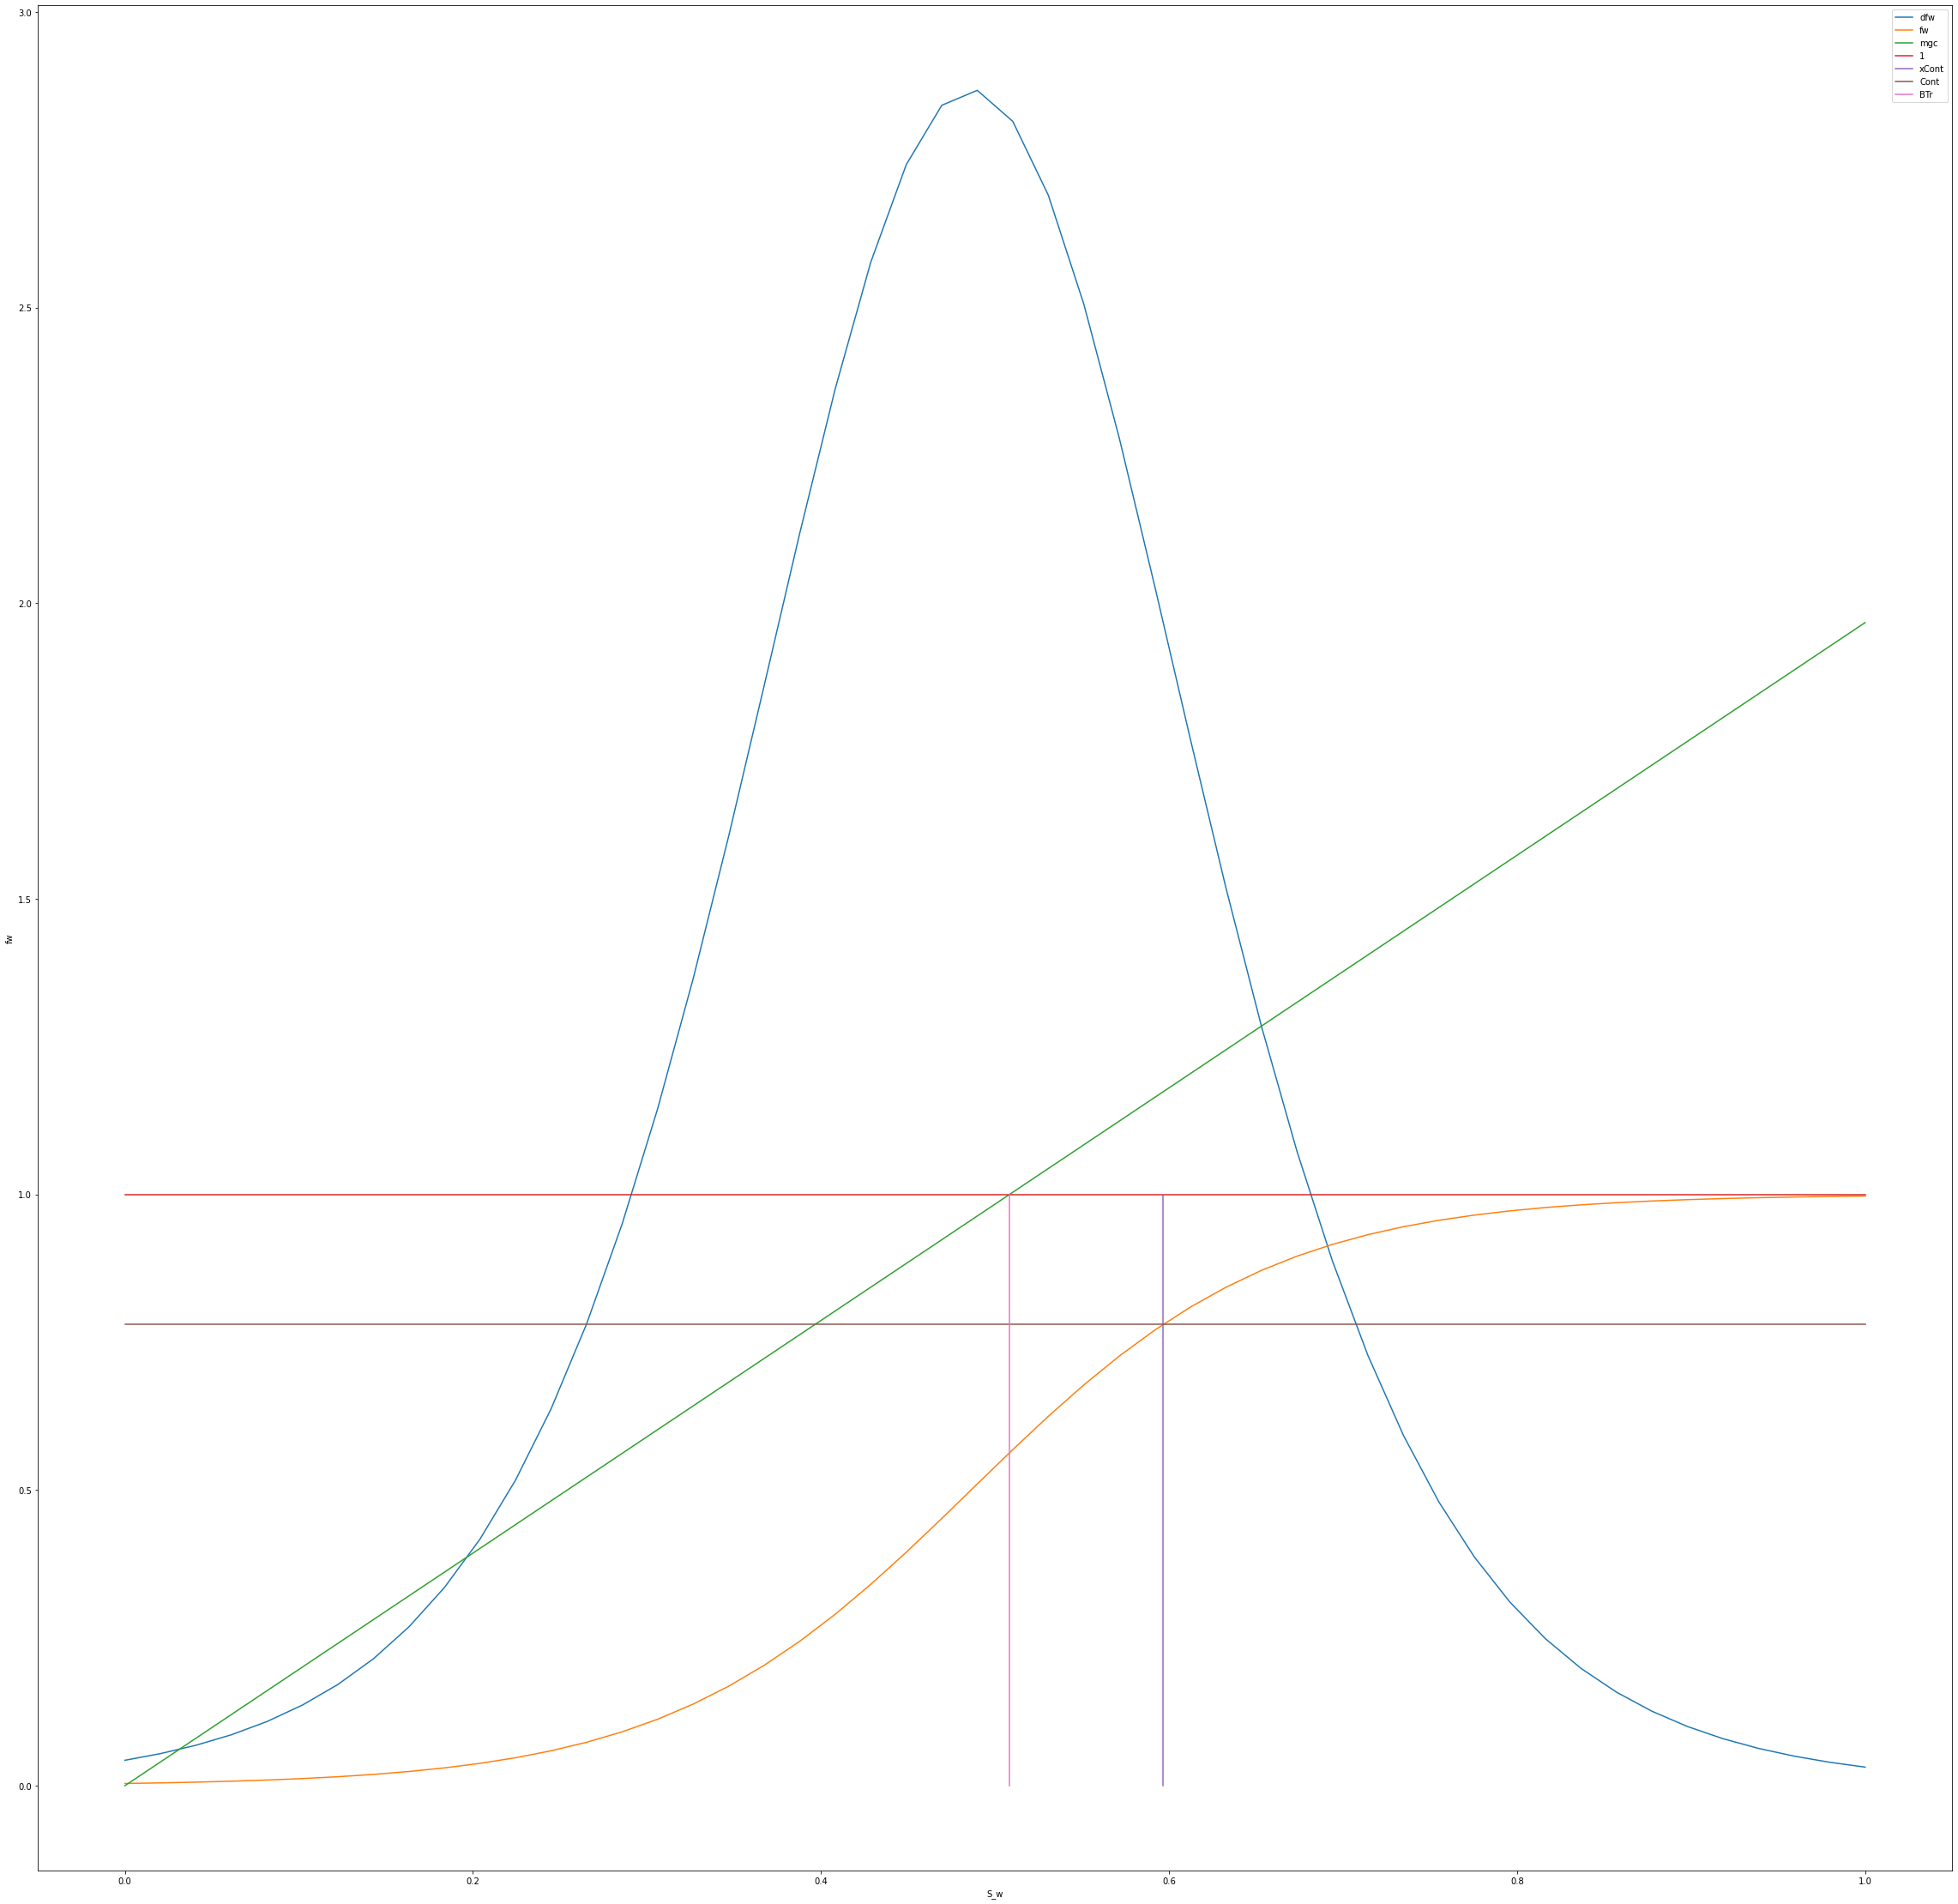

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#For large graphs
plt.rcParams["figure.figsize"] = (40,40)
Sw = np.linspace(0.0, 1.0)
y = FW(Sw,ab[0],ab[1])
dy = dFWdSW(Sw,ab[0],ab[1])
#plt.plot(Sw, y, label="fw",Sw,dy, label="dfw")
plt.plot(Sw,dy, label="dfw")
plt.plot(Sw, y, label="fw")
plt.plot(Sw, Sw*dFWdSW(TSw,ab[0],ab[1]), label="mgc")
plt.plot(Sw, numpy.ones(len(Sw)), label="1")
plt.plot([TSw,TSw], [0,1], label="xCont")
plt.plot([0,1], [FW(TSw,ab[0],ab[1]),FW(TSw,ab[0],ab[1])], label="Cont")
plt.plot([1.0/dFWdSW(TSw,ab[0],ab[1]),1.0/dFWdSW(TSw,ab[0],ab[1])], [0,1], label="BTr")
plt.xlabel('S_w')
plt.ylabel('fw')
plt.legend()
plt.show()

####Below: Attempts at animation all failed on Colab. :(

In [ ]:
#https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
import matplotlib.pyplot as plt
import numpy as np
#Added animation code(!)
#https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
import time
#For large graphs
#plt.rcParams["figure.figsize"] = (10,10)
#
plt.ion()
fig = plt.figure()
Sw = np.linspace(0.0, 1.0)
y = FW(Sw,ab[0],ab[1])
dy = dFWdSW(Sw,ab[0],ab[1])
plt.plot(y, Sw, label=['$f_w$'])
plt.plot(dy,Sw, label=['$df_w$'])
figure.canvas.draw()
plt.show()
fig.clear()
plt.clf()
plt.cla()
plt.close(fig)
plt.close('all')
time.sleep(5) # https://www.programiz.com/python-programming/time/sleep
#print("plot close - sleep 5 seconds")
#
#plt.hold(True) - removed!
#plt.plot(y, Sw, label=['$f_w$'])
#plt.plot(dy,Sw, label=['$df_w$'])
#
plt.plot([1, 1],[0, 1], label=['$S_{or}$'])
plt.plot([0, 1],[TSw, TSw], label=['Cont'])
plt.plot(Sw*dFWdSW(TSw,ab[0],ab[1]), Sw, label="mgc")
plt.plot([FW(TSw,ab[0],ab[1]),FW(TSw,ab[0],ab[1])], [0,1], label="Cont")
plt.plot([0,1], [1.0/dFWdSW(TSw,ab[0],ab[1]),1.0/dFWdSW(TSw,ab[0],ab[1])], label="BTr")
#
plt.xlabel('$S_w$')
plt.ylabel('y')
plt.legend()
figure.canvas.draw()
plt.draw()
print("fignums",plt.get_fignums())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

line1.set_ydata(np.sin(x + phase))
fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(5)
line1.set_ydata(np.sin(0))
fig.canvas.draw()
fig.canvas.flush_events()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

x = np.linspace(0, 10, 100)
y = np.cos(x)

fig = plt.figure()

for p in range(50):
    p=3
    updated_x=x+p
    updated_y=np.cos(x)
    plt.plot(updated_x,updated_y)
    plt.draw()  
    x=updated_x
    y=updated_y
    plt.pause(0.2)
    fig.clear()
